# Final Project

In [ ]:
pip install alpha-vantage

### Improt Libraries

In [1]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import requests
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import datetime
import numpy as np
import matplotlib.dates as mdates

### Step 2: Read Conformed cases and death cases in two Dataframes

In [2]:
df_confirm_cases = pd.read_csv ('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_death_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [3]:
df_confirm_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22,4/25/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,178387,178418,178457,178513,178574,178611,178638,178648,178689,178745
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,274462,274504,274520,274535,274606,274606,274737,274791,274828,274828
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265739,265739,265741,265746,265746,265754,265761,265761,265767,265771
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,40709,40709,40709,40709,41013,41013,41013,41013,41013,41013
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99194,99194,99194,99287,99287,99287,99287,99287,99287,99287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,656617,656617,656617,656876,656876,656876,656876,656876,656876,656876
280,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
281,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11817,11817,11818,11818,11818,11818,11818,11818,11818,11818
282,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,318467,318515,318515,318640,318640,318984,318984,318984,318984,319316


In [5]:
df_death_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22,4/25/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7676,7678,7679,7680,7680,7680,7680,7681,7682,7683
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3496,3496,3496,3496,3496,3496,3496,3496,3496,3496
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6874,6874,6874,6874,6874,6874,6874,6874,6875,6875
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5656,5656,5656,5657,5657,5657,5657,5657,5657,5657
280,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
281,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2148,2148,2148,2148,2148,2148,2148,2148,2149,2149
282,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,3973,3973,3973,3973,3973,3974,3974,3974,3974,3976


### Step 3: Dataframe that aggregates and sums both confirmed cases and deaths on a global level.

### First remove all the unnecessary columns from both the dataset like Province/State, Lat, Long from the dataframe

In [6]:
df_confirm_cases.drop(columns=['Province/State','Lat','Long'], inplace=True)
df_death_cases.drop(columns=['Province/State','Lat','Long'], inplace=True)

In [7]:
df_confirm_cases

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22,4/25/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,178387,178418,178457,178513,178574,178611,178638,178648,178689,178745
1,Albania,0,0,0,0,0,0,0,0,0,...,274462,274504,274520,274535,274606,274606,274737,274791,274828,274828
2,Algeria,0,0,0,0,0,0,0,0,0,...,265739,265739,265741,265746,265746,265754,265761,265761,265767,265771
3,Andorra,0,0,0,0,0,0,0,0,0,...,40709,40709,40709,40709,41013,41013,41013,41013,41013,41013
4,Angola,0,0,0,0,0,0,0,0,0,...,99194,99194,99194,99287,99287,99287,99287,99287,99287,99287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,656617,656617,656617,656876,656876,656876,656876,656876,656876,656876
280,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
281,Yemen,0,0,0,0,0,0,0,0,0,...,11817,11817,11818,11818,11818,11818,11818,11818,11818,11818
282,Zambia,0,0,0,0,0,0,0,0,0,...,318467,318515,318515,318640,318640,318984,318984,318984,318984,319316


In [8]:
df_death_cases

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22,4/25/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,7676,7678,7679,7680,7680,7680,7680,7681,7682,7683
1,Albania,0,0,0,0,0,0,0,0,0,...,3496,3496,3496,3496,3496,3496,3496,3496,3496,3496
2,Algeria,0,0,0,0,0,0,0,0,0,...,6874,6874,6874,6874,6874,6874,6874,6874,6875,6875
3,Andorra,0,0,0,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,Angola,0,0,0,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,5656,5656,5656,5657,5657,5657,5657,5657,5657,5657
280,Winter Olympics 2022,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
281,Yemen,0,0,0,0,0,0,0,0,0,...,2148,2148,2148,2148,2148,2148,2148,2148,2149,2149
282,Zambia,0,0,0,0,0,0,0,0,0,...,3973,3973,3973,3973,3973,3974,3974,3974,3974,3976


### Let's make the copy of this dataset for to analys effect of covid on the sharemarket

In [9]:
df_conformed = df_confirm_cases
df_death = df_death_cases

There are many records for the same country is present in the dataframe let's merge those using groupby on country column and sum the cases

In [10]:
df_conformed = df_confirm_cases.groupby(['Country/Region']).sum()
df_conformed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22,4/25/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,178387,178418,178457,178513,178574,178611,178638,178648,178689,178745
Albania,0,0,0,0,0,0,0,0,0,0,...,274462,274504,274520,274535,274606,274606,274737,274791,274828,274828
Algeria,0,0,0,0,0,0,0,0,0,0,...,265739,265739,265741,265746,265746,265754,265761,265761,265767,265771
Andorra,0,0,0,0,0,0,0,0,0,0,...,40709,40709,40709,40709,41013,41013,41013,41013,41013,41013
Angola,0,0,0,0,0,0,0,0,0,0,...,99194,99194,99194,99287,99287,99287,99287,99287,99287,99287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,656617,656617,656617,656876,656876,656876,656876,656876,656876,656876
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,0,0,0,0,0,0,0,0,0,0,...,11817,11817,11818,11818,11818,11818,11818,11818,11818,11818


In [15]:
df_death = df_death_cases.groupby(['Country/Region']).sum()
df_death

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22,4/25/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,7676,7678,7679,7680,7680,7680,7680,7681,7682,7683
Albania,0,0,0,0,0,0,0,0,0,0,...,3496,3496,3496,3496,3496,3496,3496,3496,3496,3496
Algeria,0,0,0,0,0,0,0,0,0,0,...,6874,6874,6874,6874,6874,6874,6874,6874,6875,6875
Andorra,0,0,0,0,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
Angola,0,0,0,0,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,5656,5656,5656,5657,5657,5657,5657,5657,5657,5657
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,2148,2148,2148,2148,2148,2148,2148,2148,2149,2149


In [29]:
df_covid_conform = df_conformed.sum(axis=1)
df_covid_conform = df_covid_conform.reset_index()

df_covid_conform.columns = ['Country', 'Conformed_cases']
df_covid_conform

,Country,Conformed_cases
0,Afghanistan,67638998
1,Albania,84857095
2,Algeria,97086858
3,Andorra,9966691
4,Angola,27318993
...,...,...
193,West Bank and Gaza,193250942
194,Winter Olympics 2022,44332
195,Yemen,4094099
196,Zambia,90415414


In [30]:
df_covid_death = df_death.sum(axis=1)
df_covid_death = df_covid_death.reset_index()

df_covid_death.columns = ['Country', 'Total_Death']
df_covid_death

,Country,Total_Death
0,Afghanistan,2943222
1,Albania,1352122
2,Algeria,2713864
3,Andorra,77266
4,Angola,622394
...,...,...
193,West Bank and Gaza,1944712
194,Winter Olympics 2022,0
195,Yemen,830178
196,Zambia,1354545


### Let's merge above 2 Dataframe Based Country column For step 3 Complete. Dataframe with conformed cases and death at global level.

In [31]:
df_global_level = pd.merge(df_covid_conform, df_covid_death, on='Country')
df_global_level

,Country,Conformed_cases,Total_Death
0,Afghanistan,67638998,2943222
1,Albania,84857095,1352122
2,Algeria,97086858,2713864
3,Andorra,9966691,77266
4,Angola,27318993,622394
...,...,...,...
193,West Bank and Gaza,193250942,1944712
194,Winter Olympics 2022,44332,0
195,Yemen,4094099,830178
196,Zambia,90415414,1354545


### Step 4: Research a stock

In [44]:
acc_key = 'PXFZN4HC8RMSJ3EM'
ts = TimeSeries(key=acc_key,output_format='pandas')
a_american = ts.get_weekly_adjusted('NASDX')
b_canadian = ts.get_weekly_adjusted('TSCO.LON')
c_travel = ts.get_weekly_adjusted('AC') 
d_real_estate = ts.get_weekly_adjusted('PLD')
e_precious_metals = ts.get_weekly_adjusted('CIGI')

In [56]:
df_america = pd. DataFrame(a_american[0])
df_canada = pd.DataFrame(b_canadian[0]) 
df_travel = pd.DataFrame(c_travel[0]) 
df_real_estate = pd.DataFrame(d_real_estate[0]) 
df_precious_metal = pd.DataFrame(e_precious_metals[0])

df_america = df_america.reset_index(level=0)
df_canada = df_canada.reset_index(level=0)
df_travel = df_travel.reset_index(level=0)
df_real_estate = df_real_estate.reset_index(level=0)
df_precious_metal = df_precious_metal.reset_index(level=0)

### Step 5: Use AlphaVantage (the stock API used earlier in the course) to get the daily high and low prices for your selected stocks

In [58]:
df_america = df_america[['date','2. high','3. low']]
df_canada = df_canada[['date','2. high','3. low']]
df_travel = df_travel[['date','2. high','3. low']]
df_real_estate = df_real_estate[['date','2. high','3. low']]
df_precious_metal = df_precious_metal[['date','2. high','3. low']]

In [59]:
df_america.columns = ['date', 'US_high','US_low']
df_canada.columns = ['date', 'CAN_high','CAN_low']
df_travel.columns = ['date', 'Travel_high','Travel_low']
df_real_estate.columns = ['date', 'Real_estate_high','Real_estate_low']
df_precious_metal.columns = ['date', 'Metal_high','Metal_low']

### Let's merge these stock dataframes

In [61]:
df_stocks = df_america.merge(df_canada,on='date').merge(df_travel,on='date').merge(df_real_estate,on='date').merge(df_precious_metal,on='date')
df_stocks

,date,US_high,US_low,CAN_high,CAN_low,Travel_high,Travel_low,Real_estate_high,Real_estate_low,Metal_high,Metal_low
0,2022-04-22,31.56,29.67,271.9000,262.4000,41.0182,36.9968,174.540,162.1800,128.17,119.080
1,2022-04-14,31.58,30.86,275.8000,251.6088,39.6390,36.5800,169.340,162.5100,127.44,121.080
2,2022-04-08,33.67,31.83,283.4000,269.1000,40.8220,36.9700,170.660,162.1700,132.56,122.170
3,2022-04-01,33.87,32.96,284.4325,276.0000,43.0964,40.5000,166.220,157.0850,133.44,127.560
4,2022-03-25,32.82,31.96,281.5500,274.2500,41.4894,39.6000,160.850,154.1100,134.26,127.290
...,...,...,...,...,...,...,...,...,...,...,...
325,2016-01-08,11.52,10.94,150.0000,137.0000,30.4000,29.1100,42.935,41.0000,44.95,41.475
326,2015-12-31,12.03,11.77,151.5500,147.2000,31.1900,29.4700,43.600,42.2402,45.13,43.940
327,2015-12-24,11.87,11.70,153.1500,141.0000,31.8500,29.9000,42.690,41.5900,45.30,43.680
328,2015-12-18,11.96,11.58,153.0360,142.6000,31.4100,28.0500,42.470,40.4700,45.27,43.760


### step 6: Append that info to the data frame created in step 3

In [88]:
df_conformed1 = df_conformed.reset_index()

In [89]:
df_death1 = df_death.reset_index()

In [90]:
df_can_case = df_conformed1[df_conformed1['Country/Region']=='Canada']
df_us_case = df_conformed1[df_conformed1['Country/Region']=='US']
df_row_case = pd.concat([df_can_case, df_us_case], ignore_index=True)
df_row_case

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22,4/25/22
0,Canada,0,2,3,3,3,3,4,4,4,...,3644519,3646457,3658431,3666324,3679757,3690272,3707562,3712313,3716970,3720853
1,US,1,1,2,2,5,5,5,6,6,...,80627583,80634352,80695043,80734214,80802737,80861910,80951568,80971230,80984214,81043315


In [91]:
df_new = df_row_case.transpose()
df_new = df_new.reset_index()
df_new.columns = ['date1','Canada_Conformed_case','US_Conformed_case']
df_new = df_new.iloc[1: , :]
df_new

,date1,Canada_Conformed_case,US_Conformed_case
1,1/22/20,0,1
2,1/23/20,2,1
3,1/24/20,3,2
4,1/25/20,3,2
5,1/26/20,3,5
...,...,...,...
821,4/21/22,3690272,80861910
822,4/22/22,3707562,80951568
823,4/23/22,3712313,80971230
824,4/24/22,3716970,80984214


In [92]:
df_can_death = df_death1[df_conformed1['Country/Region']=='Canada']
df_us_death = df_death1[df_conformed1['Country/Region']=='US']
df_row_death = pd.concat([df_can_death, df_us_death], ignore_index=True)
df_row_death

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/16/22,4/17/22,4/18/22,4/19/22,4/20/22,4/21/22,4/22/22,4/23/22,4/24/22,4/25/22
0,Canada,0,0,0,0,0,0,0,0,0,...,38392,38413,38445,38474,38576,38696,38801,38853,38878,38893
1,US,0,0,0,0,0,0,0,0,0,...,988727,988735,988993,989425,990302,990679,991241,991303,991326,991609


In [93]:
df_new1 = df_row_death.transpose()
df_new1 = df_new1.reset_index()
df_new1.columns = ['date1','Canada_Death','US_Death']
df_new1 = df_new1.iloc[1: , :]
df_new1

,date1,Canada_Death,US_Death
1,1/22/20,0,0
2,1/23/20,0,0
3,1/24/20,0,0
4,1/25/20,0,0
5,1/26/20,0,0
...,...,...,...
821,4/21/22,38696,990679
822,4/22/22,38801,991241
823,4/23/22,38853,991303
824,4/24/22,38878,991326


In [94]:
df_final = df_new.merge(df_new1,on='date1')
df_final

,date1,Canada_Conformed_case,US_Conformed_case,Canada_Death,US_Death
0,1/22/20,0,1,0,0
1,1/23/20,2,1,0,0
2,1/24/20,3,2,0,0
3,1/25/20,3,2,0,0
4,1/26/20,3,5,0,0
...,...,...,...,...,...
820,4/21/22,3690272,80861910,38696,990679
821,4/22/22,3707562,80951568,38801,991241
822,4/23/22,3712313,80971230,38853,991303
823,4/24/22,3716970,80984214,38878,991326


In [97]:
# change date formate
df_final['date']=pd.to_datetime(df_final['date1'])
df_final.drop(columns=['date1'], inplace=True)
df_final

,Canada_Conformed_case,US_Conformed_case,Canada_Death,US_Death,date
0,0,1,0,0,2020-01-22
1,2,1,0,0,2020-01-23
2,3,2,0,0,2020-01-24
3,3,2,0,0,2020-01-25
4,3,5,0,0,2020-01-26
...,...,...,...,...,...
820,3690272,80861910,38696,990679,2022-04-21
821,3707562,80951568,38801,991241,2022-04-22
822,3712313,80971230,38853,991303,2022-04-23
823,3716970,80984214,38878,991326,2022-04-24


In [98]:
final_df = df_final.merge(df_stocks, on='date', how='left')
final_df

,Canada_Conformed_case,US_Conformed_case,Canada_Death,US_Death,date,US_high,US_low,CAN_high,CAN_low,Travel_high,Travel_low,Real_estate_high,Real_estate_low,Metal_high,Metal_low
0,0,1,0,0,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,0,0,2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2,0,0,2020-01-24,21.07,20.90,250.3261,240.6001,65.4600,42.3000,96.78,93.12,84.20,80.91
3,3,2,0,0,2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,5,0,0,2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,3690272,80861910,38696,990679,2022-04-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
821,3707562,80951568,38801,991241,2022-04-22,31.56,29.67,271.9000,262.4000,41.0182,36.9968,174.54,162.18,128.17,119.08
822,3712313,80971230,38853,991303,2022-04-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
823,3716970,80984214,38878,991326,2022-04-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Step 7: Create Graphs

Overall American Stock market 

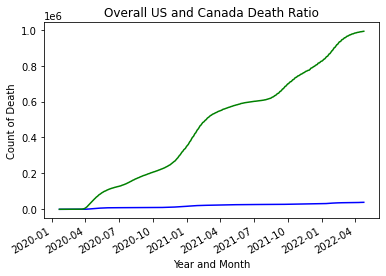

In [104]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


fig = plt.figure()

plt.plot_date(final_df['date'], final_df['Canada_Death'], 'b-')
plt.plot_date(final_df['date'], final_df['US_Death'], 'g-')
plt.title("Overall US and Canada Death Ratio")
plt.xlabel('Year and Month')
plt.ylabel('Count of Death')

fig.autofmt_xdate()
plt.show()

* From above graph we can see that canada has lower Death ratio than the US  
Blue Line = Canada  
Green Line = US

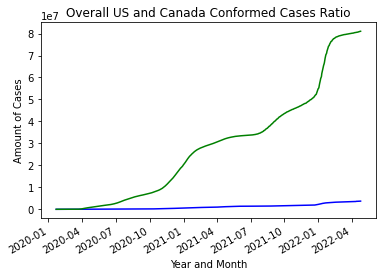

In [105]:
fig = plt.figure()

plt.plot_date(final_df['date'], final_df['Canada_Conformed_case'], 'b-')
plt.plot_date(final_df['date'], final_df['US_Conformed_case'], 'g-')
plt.title("Overall US and Canada Conformed Cases Ratio")
plt.xlabel('Year and Month')
plt.ylabel('Amount of Cases')

fig.autofmt_xdate()
plt.show()

* From above graph we can see that canada has lower cases than the US  
Blue Line = Canada  
Green Line = US

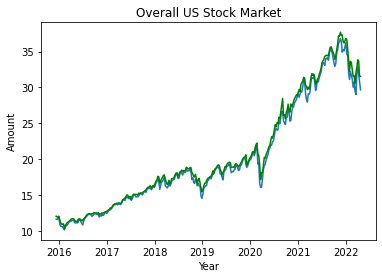

In [110]:
plt.plot(df_stocks["date"], df_stocks["US_low"])
plt.plot(df_stocks["date"], df_stocks["US_high"],'g-')

plt.title("Overall US Stock Market")
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

* As we can see increasing number of conformed cases and the death has not affected the US overall Stock market. As this market shows keep increasing trend till end of the 2021 and then it little declined.

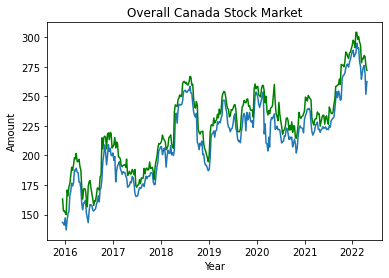

In [112]:
plt.plot(df_stocks["date"], df_stocks["CAN_low"])
plt.plot(df_stocks["date"], df_stocks["CAN_high"],'g-')

plt.title("Overall Canada Stock Market")
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

* As we can see increasing number of conformed cases and the death has not affected the CANADA overall Stock market. As this market shows keep increasing trend till end of the 2021 and then it little declined.